In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

# 1. Estructura de los datos

El dataset contine **284,807** transacciones y **31** columnas. Las variables ```V1``` a ```V28``` son componentes resultantes de un PCA aplicado previamente (por razones de privacidad). Las únicas variables originales son ```Time```, ```Amount``` y ```Class```.

In [4]:
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.shape)

(284807, 31)


# 2. Tipos de datos y valores faltantes

Todas las columnas son numéricas (float64), excepto la variable objetivo ```Class``` (int64). No hay valores nulos en el dataset, por lo que no se requieren imputaciones.

In [24]:
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [7]:
# Valores nulos por columna
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 3. Duplicados

Se detectaron **1081 filas duplicadas**, lo que sugiere la necesidad de limpiar el dataset antes del entrenamiento para evitar sesgos o sobreajuste.

In [7]:
print(df.duplicated().sum())

1081


# 4. Distribución de clases

El dataset presenta un **fuerte desbalance de clases**, donde solo el **0.17%** de las transacciones son fraudulentes. Esto implica que se deben usar técnicas de balanceo como **undersampling**, **oversampling** o **SMOTE**, y métricas adecuadas como **F1-score** o **ROC-AUC** en lugar de solo utilizar la accuracy.

Text(0.5, 0.9, 'Fraudulent transactions: 0.17%')

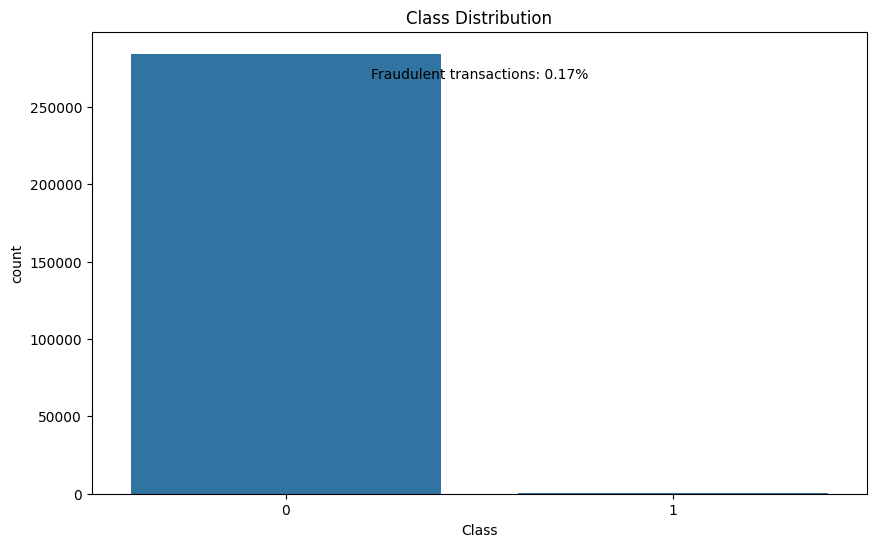

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.annotate('Fraudulent transactions: {:.2f}%'.format(df['Class'].mean() * 100), xy=(0.5, 0.9), xycoords='axes fraction', ha='center')

# 5. Distribución de variables
Las variables transformadas as ```V1``` a ```V28``` tienen distribuciones variadas, con muchos valores centrados en 0. Esto es esperable al provenir de una reducción PCA. La variable ```Time``` está sesgada, y ```Amount``` tiene una distribución altamente asimétrica, lo cual puede requerir transformación logarítmica.

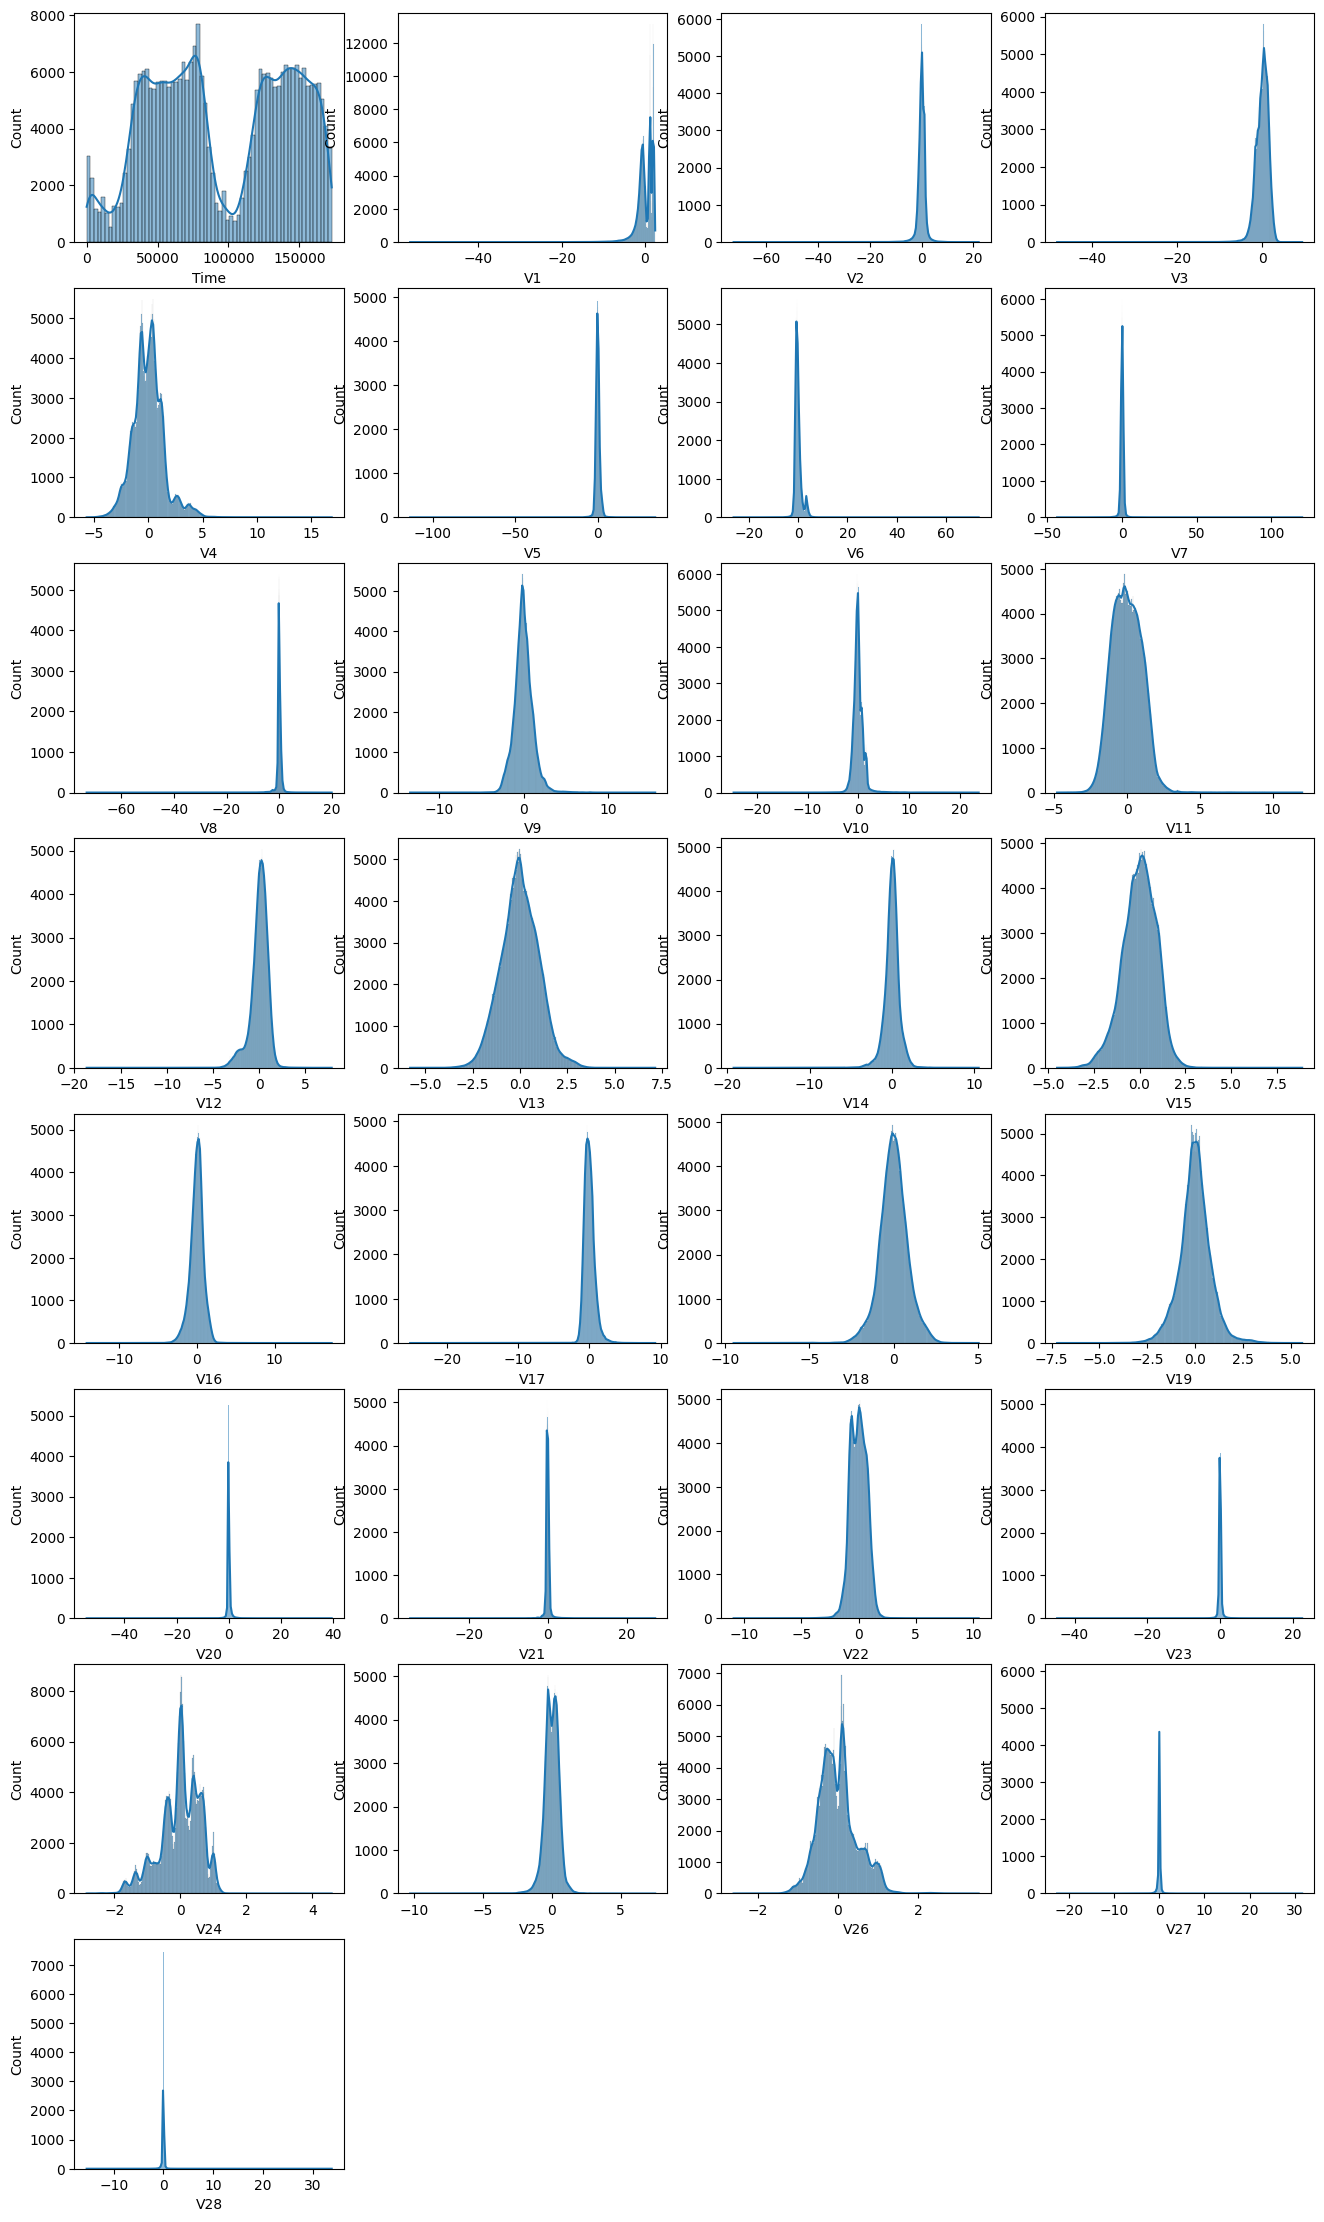

In [ ]:
fig = plt.figure(figsize=(16, 28))

for col in df.drop(["Amount", "Class"], axis=1).columns:
    ax = fig.add_subplot(8, 4, df.drop(["Class"], axis=1).columns.get_loc(col) + 1)
    sns.histplot(df[col], kde=True, ax=ax)

# 6. Correlación con la variable ```Class```
La correlación entre la ```Class``` y las variables independientes es en general **muy baja**, lo que es habitual en detección de fraudes. Algunas variables (```V10```, ```V14```, ```V17V```) muestran valores en extremo negativos o positivos moderadamente correlacionados, que pueden ser relevantes en el modelado.

<Axes: title={'center': 'Correlation with Class'}>

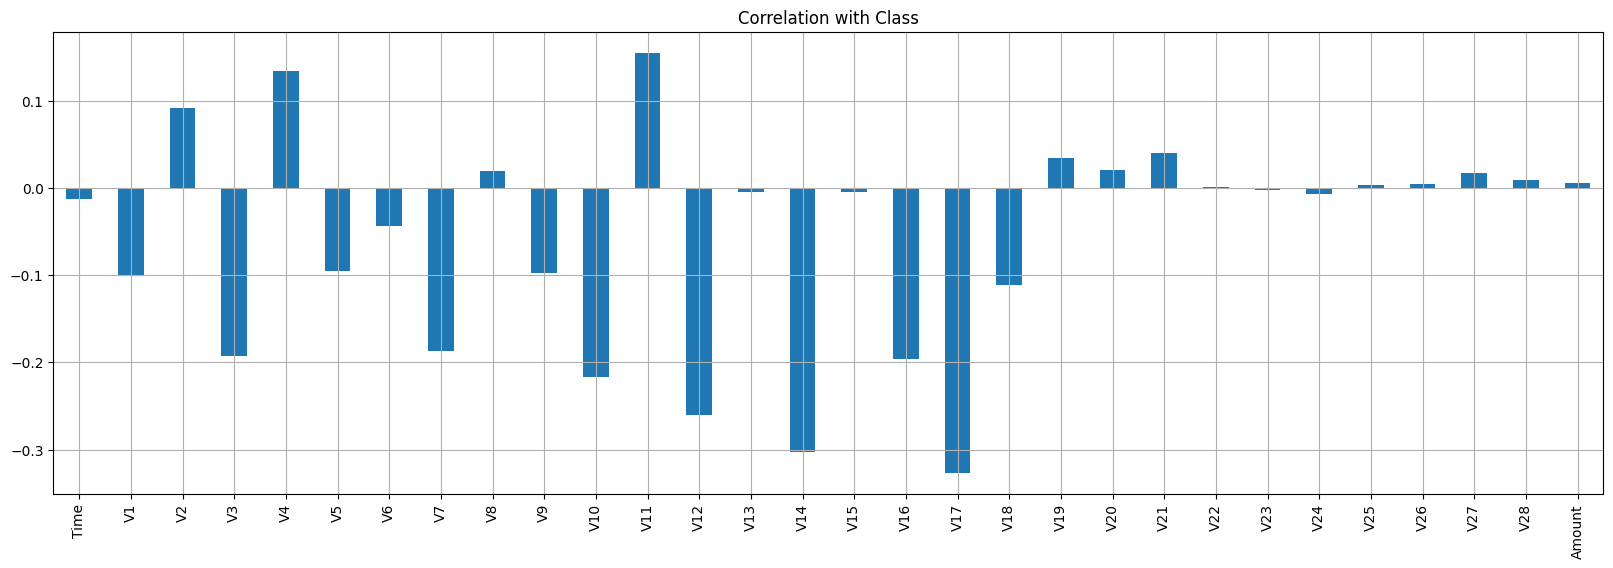

In [13]:
df.drop("Class",axis=1).corrwith(df["Class"]).plot(kind='bar', figsize=(20, 6), title='Correlation with Class', grid=True)